# Autoencoder

<img src='https://i.pinimg.com/originals/3d/45/81/3d458124f354ed351bf40740c08a1446.png' width='700'>

(explanation)

## Import libraries

In [21]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import cv2
import numpy as np

## Import MNIST dataset

In [3]:
(X_train, y_train), (X_valid, y_valid) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


## Checking dataset shape

In [16]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_valid shape: {X_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_valid shape: (10000, 28, 28)
y_valid shape: (10000,)


## Take a glance on dataset/ image

5 0 4 1 9 2 1 3 1 

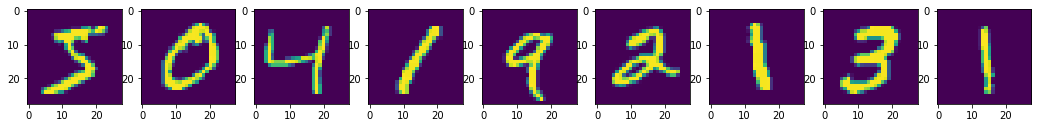

In [57]:
plt.figure(figsize=(18,5))
for i in range(9):
    plt.subplot(191+i)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')
plt.show()

## Buidling Model

In [66]:
width = X_valid.shape[1]
height = X_valid.shape[2]
color_channel = 1

class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.flatten = tf.keras.layers.Flatten()
        
        self.encoder = tf.keras.Sequential([
            keras.layers.Dense(width * height, activation='relu'),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(32, activation='relu'),])
        
        self.decoder = tf.keras.Sequential([
            keras.layers.Dense(64, activation='relu'),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(width * height, activation='sigmoid'),])
        
    def call(self, x):
        x_reshape = self.flatten(x)
        x = self.encoder(x_reshape)
        x = self.decoder(x)
        return x, x_reshape
    
def loss(x, x_bar):
    return tf.losses.mean_squared_error(x, x_bar)

def grad(model, inputs):
    with tf.GradientTape() as tape:
        reconstruction, inputs_reshaped = model(inputs)
        loss_value = loss(inputs_reshaped, reconstruction)
    return loss_value, tape.gradient(loss_value, model.trainable_variables), inputs_reshaped, reconstruction

In [77]:
model = AutoEncoder()

optimizer = tf.optimizers.Adam(learning_rate=0.001)
global_step = tf.Variable(0)

num_epochs = 5
batch_size = 4

for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    for x in range(0, len(X_train), batch_size):
        x_inp = X_train[x : x + batch_size]
        loss_value, grads, inputs_reshaped, reconstruction = grad(model, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
        
        if global_step.numpy() % 200 == 0:
            print("Step: {},         Loss: {}".format(global_step.numpy(), loss(inputs_reshaped, reconstruction).numpy()))
        

Epoch:  0
Step: 0,         Loss: [7543.0767 8570.337  4888.0273 4819.844 ]
Step: 0,         Loss: [ 6378.963   7963.204   5084.4873 10146.454 ]
Step: 0,         Loss: [2944.7258 5864.375  8107.831  3761.491 ]
Step: 0,         Loss: [9978.429  7652.4775 3177.5784 6994.0396]
Step: 0,         Loss: [6604.2334 7297.8047 3324.248  4715.5034]
Step: 0,         Loss: [9723.453  9910.574  3994.2114 4609.3027]
Step: 0,         Loss: [ 5875.1123 11555.725   3427.4143 13439.804 ]
Step: 0,         Loss: [12055.454   4221.156   6790.6724  9241.2295]
Step: 0,         Loss: [ 4439.632   5709.271  10507.979   4223.4565]
Step: 0,         Loss: [ 9214.848  10588.808   5892.3765  7403.794 ]
Step: 0,         Loss: [3769.5989 7720.189  3226.498  4776.006 ]
Step: 0,         Loss: [4396.7334 6561.6772 5898.5273 6421.6694]
Step: 0,         Loss: [ 4354.383  9205.324  4826.744 13125.339]
Step: 0,         Loss: [7745.825  4200.248  6323.3633 8949.49  ]
Step: 0,         Loss: [12090.679   5331.4497  9943.805   47

Step: 0,         Loss: [4591.711  8336.732  3401.0613 5931.2754]
Step: 0,         Loss: [ 8994.507  5177.671  4175.426 10302.021]
Step: 0,         Loss: [ 7108.967   7985.5254  4914.2153 11671.368 ]
Step: 0,         Loss: [7888.9883 9017.255  7572.2256 3984.5715]
Step: 0,         Loss: [ 8615.883   6832.3022 12314.9375  6909.9775]
Step: 0,         Loss: [12703.216   6845.4985  5897.288   5182.416 ]
Step: 0,         Loss: [7793.2026 4396.8804 6651.1494 5039.4233]
Step: 0,         Loss: [ 4302.394  5969.44   3172.81  10286.53 ]
Step: 0,         Loss: [ 4269.2983  6093.0254 10379.082   4933.191 ]
Step: 0,         Loss: [8885.505  7696.8774 6665.8496 6215.2056]
Step: 0,         Loss: [10378.92    7501.936   6349.0244  8008.3584]
Step: 0,         Loss: [ 5782.736   4289.107  11101.2295  7853.971 ]
Step: 0,         Loss: [5786.762  8697.569  3360.8767 8066.0586]
Step: 0,         Loss: [4395.0264 6807.676  5868.084  7939.9604]
Step: 0,         Loss: [6669.8496 9806.947  5062.8086 5302.205 ]
S

Step: 0,         Loss: [3858.3303 6452.2603 7479.633  6914.4424]
Step: 0,         Loss: [6787.9517 2550.6042 9884.267  7990.3228]
Step: 0,         Loss: [6799.75   5636.7983 2958.3252 3202.3303]
Step: 0,         Loss: [5108.0317 4977.0415 7270.2476 4065.43  ]
Step: 0,         Loss: [ 8182.3267  7031.473  13683.23    2449.75  ]
Step: 0,         Loss: [7328.847  6892.1377 4000.8928 5866.528 ]
Step: 0,         Loss: [6882.801  3841.4185 6587.905  6009.3086]
Step: 0,         Loss: [11776.784   7941.0776  5255.7866  7942.3994]
Step: 0,         Loss: [4109.2754 7831.6504 4218.7817 9853.388 ]
Step: 0,         Loss: [9957.964  5914.3203 6634.7705 4168.88  ]
Step: 0,         Loss: [4012.2832 5615.954  5868.8354 6184.2026]
Step: 0,         Loss: [4824.607  4798.018  5058.9233 5265.0483]
Step: 0,         Loss: [3447.7373 6091.037  6952.334  5045.7334]
Step: 0,         Loss: [5784.296 2669.856 5689.732 8854.542]
Step: 0,         Loss: [6779.5444 5707.4336 5839.6924 6084.3047]
Step: 0,         Loss

Step: 0,         Loss: [7956.629  6014.9194 5899.4746 5478.8535]
Step: 0,         Loss: [ 7008.746  13130.398   6287.283   7936.9453]
Step: 0,         Loss: [5679.194 3060.389 4620.398 5443.094]
Step: 0,         Loss: [ 5412.592   5394.9336 11297.121   4251.0713]
Step: 0,         Loss: [4894.8164 7643.7373 7444.4004 4812.598 ]
Step: 0,         Loss: [9159.938  6980.0894 8334.724  5101.769 ]
Step: 0,         Loss: [6604.671 7870.875 8821.925 7706.777]
Step: 0,         Loss: [6275.2397 6441.175  7082.825  7351.5674]
Step: 0,         Loss: [3283.5383 5053.0024 6863.9785 4065.782 ]
Step: 0,         Loss: [ 3887.4988  6518.791  13469.499   6871.1646]
Step: 0,         Loss: [5230.742  5016.6797 4369.217  5288.722 ]
Step: 0,         Loss: [9704.525  4471.245  9962.336  6461.1377]
Step: 0,         Loss: [8014.8584 7686.338  3819.148  8711.355 ]
Step: 0,         Loss: [ 6183.3765  5712.3687 10155.687   7247.9414]
Step: 0,         Loss: [ 7201.754   7506.5957  4973.027  10984.937 ]
Step: 0,     

Step: 0,         Loss: [ 8014.8687 11709.648   5028.1235 14869.145 ]
Step: 0,         Loss: [ 6084.278   7724.4526  5765.     10252.441 ]
Step: 0,         Loss: [ 5275.166  9607.596 12454.222 10201.546]
Step: 0,         Loss: [5089.0713 9283.676  6630.413  8780.293 ]
Step: 0,         Loss: [ 5023.996   9548.414  10567.78   10788.3125]
Step: 0,         Loss: [10491.23    9911.212   8243.688   7235.3506]
Step: 0,         Loss: [6009.6787 4777.908  4474.5215 8720.937 ]
Step: 0,         Loss: [6299.38   6305.7744 7575.7515 4383.694 ]
Step: 0,         Loss: [ 4110.342   5406.643   3529.7231 11577.993 ]
Step: 0,         Loss: [5508.8354 9880.408  3778.3264 6282.792 ]
Step: 0,         Loss: [6531.0767 8817.8125 7734.3047 8175.1084]
Step: 0,         Loss: [ 4203.005  8670.197  5908.708 10186.153]
Step: 0,         Loss: [ 6387.4375 10784.033   5127.5244  9153.434 ]
Step: 0,         Loss: [ 7882.1265  8953.018   5068.0674 10918.175 ]
Step: 0,         Loss: [ 5780.1606 13038.953   3924.838  12914

Step: 0,         Loss: [ 4737.31    5310.0576  6505.824  13300.329 ]
Step: 0,         Loss: [6708.564 7213.389 8297.148 6117.791]
Step: 0,         Loss: [ 8456.05  10149.375  5143.954  5699.959]
Step: 0,         Loss: [6488.5317 4359.916  7385.44   4439.815 ]
Step: 0,         Loss: [ 4005.254   8775.392  14057.747   6607.5396]
Step: 0,         Loss: [3143.394  9524.435  4052.5408 7886.8584]
Step: 0,         Loss: [8278.734  9663.691  6661.985  4731.7563]
Step: 0,         Loss: [3334.5715 9250.726  7893.1367 8495.986 ]
Step: 0,         Loss: [ 9649.053   6838.9272 12930.409   9843.935 ]
Step: 0,         Loss: [3419.5498 8062.4224 6861.084  7030.1274]
Step: 0,         Loss: [ 7357.116 11346.935  8436.962  7382.727]
Step: 0,         Loss: [ 5022.719  8462.143 12481.916  5250.935]
Step: 0,         Loss: [ 9321.749  9831.191  9635.284 10238.418]
Step: 0,         Loss: [4208.102  7131.281  4977.8076 5794.806 ]
Step: 0,         Loss: [11457.528   9713.608   3382.5664  5961.19  ]
Step: 0,     

Step: 0,         Loss: [4218.0664 6277.219  5277.1377 6591.5396]
Step: 0,         Loss: [4643.926 7913.463 4791.88  7725.972]
Step: 0,         Loss: [6622.7246 8441.199  6732.0933 5097.8867]
Step: 0,         Loss: [6441.2056 6026.935  9530.059  6341.2153]
Step: 0,         Loss: [ 6548.0854  4486.9097 11084.264   5450.6797]
Step: 0,         Loss: [ 4102.9565  5388.333  12030.912   7427.663 ]
Step: 0,         Loss: [5847.2295 7168.764  7995.379  5253.1733]
Step: 0,         Loss: [5614.13   6549.648  3636.968  4740.5293]
Step: 0,         Loss: [6844.0522 5661.7817 5967.171  3744.3584]
Step: 0,         Loss: [ 3229.8687  7247.9644 16822.06    7185.857 ]
Step: 0,         Loss: [ 5884.9756  6754.5776 10075.751   3998.644 ]
Step: 0,         Loss: [7884.5117 4359.949  5074.735  7833.5347]
Step: 0,         Loss: [4921.742  7422.4287 7941.5664 6223.629 ]
Step: 0,         Loss: [2299.171  4966.5903 3890.0574 6383.537 ]
Step: 0,         Loss: [6184.4424 5687.431  6696.982  5827.5537]
Step: 0,     

Step: 0,         Loss: [8963.5   8835.431 7333.546 7742.325]
Step: 0,         Loss: [ 3543.986   9247.358   3417.1606 12448.271 ]
Step: 0,         Loss: [ 3206.9885  6521.652   7469.1875 14630.822 ]
Step: 0,         Loss: [ 5481.4653 10848.363   8787.974   7919.6836]
Step: 0,         Loss: [11164.139   7941.7    11990.629   8064.3765]
Step: 0,         Loss: [10033.1045  8099.598   6391.242  10646.012 ]
Step: 0,         Loss: [ 5674.1084  4324.2944  8780.959  10697.221 ]
Step: 0,         Loss: [ 5487.848   6562.1567  2976.2168 10935.866 ]
Step: 0,         Loss: [ 4455.5205  8248.763  11745.361   5353.4233]
Step: 0,         Loss: [9347.425  6158.709  4908.1045 8473.001 ]
Step: 0,         Loss: [5610.028  7828.0767 6852.7974 4789.9146]
Step: 0,         Loss: [4168.4424 8768.484  6138.4106 9883.092 ]
Step: 0,         Loss: [ 5660.844  10209.826   7857.8037 11614.05  ]
Step: 0,         Loss: [ 4922.8726  3719.9668  8353.464  10305.321 ]
Step: 0,         Loss: [4445.8633 9997.396  8358.758  

Step: 0,         Loss: [ 7778.1455  6791.306  10321.694  11648.328 ]
Step: 0,         Loss: [6232.7896 7244.6455 4796.7744 8742.385 ]
Step: 0,         Loss: [ 3155.148   9561.242   8096.1147 13448.337 ]
Step: 0,         Loss: [ 4516.3267  7085.2617  7063.9424 10209.086 ]
Step: 0,         Loss: [5162.7485 6445.245  4565.55   6480.7563]
Step: 0,         Loss: [7065.584  7131.61   5068.6543 8452.414 ]
Step: 0,         Loss: [6862.3916 4559.2847 7009.4653 6702.069 ]
Step: 0,         Loss: [4560.5674 6005.0776 8001.6226 6352.0664]
Step: 0,         Loss: [ 4825.3994 10802.096   3038.5254 10683.871 ]
Step: 0,         Loss: [5895.991  5020.9004 6327.255  9480.687 ]
Step: 0,         Loss: [2376.079  3656.4656 4711.028  7886.333 ]
Step: 0,         Loss: [ 8464.209 10879.872  5639.431  9684.884]
Step: 0,         Loss: [6195.781  7947.2983 3893.481  5169.241 ]
Step: 0,         Loss: [7253.958  4711.0728 4075.2896 6189.587 ]
Step: 0,         Loss: [8587.476  6227.8506 3469.6812 8175.3228]
Step: 0, 

Step: 0,         Loss: [6409.777  5955.186  6704.2617 6310.9526]
Step: 0,         Loss: [ 9578.367  14578.172   4808.3354 14948.813 ]
Step: 0,         Loss: [ 3958.328  4052.236  6756.967 10703.367]
Step: 0,         Loss: [ 9844.971  6407.156 12142.712 10489.251]
Step: 0,         Loss: [12285.213  10266.73    8375.48    7139.3687]
Step: 0,         Loss: [6336.788 9564.417 9554.352 7803.765]
Step: 0,         Loss: [ 6446.6353 12765.289   9222.109  12150.374 ]
Step: 0,         Loss: [ 6735.3086 10879.413   8360.346   8755.742 ]
Step: 0,         Loss: [ 5211.7847 12403.646   7733.9976 11769.105 ]
Step: 0,         Loss: [11512.204   6612.459  10043.907   5778.5537]
Step: 0,         Loss: [ 6676.2183  8593.589   5453.89   10996.858 ]
Step: 0,         Loss: [15344.366  10930.683  13767.666   5758.9834]
Step: 0,         Loss: [ 2153.847 11219.102 13113.417 10101.118]
Step: 0,         Loss: [ 7837.046   7340.2793  5294.6416 10805.034 ]
Step: 0,         Loss: [ 3997.371  11157.095   6847.6367  

Step: 0,         Loss: [7709.462  8097.6377 5247.7026 6349.7627]
Step: 0,         Loss: [ 3931.2742  7066.5317  5391.458  12398.497 ]
Step: 0,         Loss: [ 3851.3367  5677.8545  5919.6914 13583.783 ]
Step: 0,         Loss: [ 7303.3735 13379.961  13023.832   6316.454 ]
Step: 0,         Loss: [ 8573.9375  4286.4224  3570.6785 11629.505 ]
Step: 0,         Loss: [ 5663.8584  8425.917   7382.8125 11698.997 ]
Step: 0,         Loss: [ 6645.1724 10527.759   7664.394  12887.921 ]
Step: 0,         Loss: [ 4551.6772  5442.844  10468.253   8009.361 ]
Step: 0,         Loss: [6864.8315 9780.795  4250.3047 6953.5317]
Step: 0,         Loss: [ 3186.7488  5149.254   5286.611  10147.668 ]
Step: 0,         Loss: [4943.426  7423.2705 9515.842  8734.504 ]
Step: 0,         Loss: [ 5919.508   7657.0215  6499.1772 11891.346 ]
Step: 0,         Loss: [ 3863.9502  5075.268   6915.8774 12428.9   ]
Step: 0,         Loss: [9535.104  9455.762  8832.928  7010.2705]
Step: 0,         Loss: [ 4025.8315  8032.3403  525

Step: 0,         Loss: [4274.281  9703.921  5027.3    7404.8735]
Step: 0,         Loss: [ 9211.887 12536.393 10261.431  4966.393]
Step: 0,         Loss: [8210.65  9704.157 8655.783 8259.505]
Step: 0,         Loss: [ 6075.2754 11022.724   6658.037   4911.121 ]
Step: 0,         Loss: [3747.347  8196.809  8163.3164 7281.986 ]
Step: 0,         Loss: [2126.8916 9965.191  2831.116  7402.792 ]
Step: 0,         Loss: [8808.602  7078.163  4402.371  5043.0435]
Step: 0,         Loss: [7011.815  6800.219  5333.7207 7004.9937]
Step: 0,         Loss: [ 4824.11  12217.804  9190.259  7393.75 ]
Step: 0,         Loss: [ 4774.1646 12911.214   4100.625   4727.383 ]
Step: 0,         Loss: [7985.4424 7211.37   9081.857  9020.125 ]
Step: 0,         Loss: [5142.2144 7542.2183 9837.883  4296.616 ]
Step: 0,         Loss: [5105.723 8618.56  6464.902 8331.446]
Step: 0,         Loss: [ 5783.1914  4911.663   4137.4336 11877.005 ]
Step: 0,         Loss: [8418.3125 7831.0103 3645.273  8946.508 ]
Step: 0,         Loss

Step: 0,         Loss: [ 9882.737   9894.74    2914.0383 12034.521 ]
Step: 0,         Loss: [ 6229.2246 12434.297   5804.1543  9414.0625]
Step: 0,         Loss: [10707.503  12664.324   6208.4336 11328.637 ]
Step: 0,         Loss: [ 6075.7    11759.797   4235.6597  6309.3213]
Step: 0,         Loss: [ 8159.406 13315.382  8465.884 14759.168]
Step: 0,         Loss: [ 6512.8853 11752.35    4688.889  11618.178 ]
Step: 0,         Loss: [ 7274.412 10443.572  9823.628  9750.651]
Step: 0,         Loss: [ 6799.9683 12779.668  10346.08    8641.    ]
Step: 0,         Loss: [10669.023 11252.059  5737.495  9718.74 ]
Step: 0,         Loss: [ 7777.8022 11435.933  11210.567  13462.2705]
Step: 0,         Loss: [ 4413.037 13417.773  4723.56  12243.842]
Step: 0,         Loss: [11253.345  6328.736  5752.144 10270.218]
Step: 0,         Loss: [9704.107  6050.921  6594.1606 6881.6226]
Step: 0,         Loss: [ 4248.735 11593.711  9411.138 13156.258]
Step: 0,         Loss: [ 5009.7617  7132.7524  4706.222  13889

Step: 0,         Loss: [6314.4785 6200.5103 9656.6875 5681.1084]
Step: 0,         Loss: [4337.426  5248.6724 3975.8228 6290.4043]
Step: 0,         Loss: [8328.203 5003.579 5963.005 5690.219]
Step: 0,         Loss: [3904.6187 3950.2793 6430.1953 6834.7476]
Step: 0,         Loss: [4670.4883 3561.172  8713.661  5527.4194]
Step: 0,         Loss: [5241.6826 4509.9604 7378.9897 6171.6455]
Step: 0,         Loss: [7098.1274 5843.87   6007.89   4686.3535]
Step: 0,         Loss: [10073.736   6940.4067  3000.7576  4077.8916]
Step: 0,         Loss: [5883.45   7475.551  4946.1045 3538.4758]
Step: 0,         Loss: [9601.037  4876.098  4361.242  5785.6377]
Step: 0,         Loss: [5885.6455 5132.561  7020.6543 6261.36  ]
Step: 0,         Loss: [10083.35   4684.133  7869.917  4117.087]
Step: 0,         Loss: [3619.0535 5742.258  2820.8367 3282.2449]
Step: 0,         Loss: [12181.836   3048.7551  3288.0815  5440.1685]
Step: 0,         Loss: [9794.49   5008.2    8498.296  3691.5127]
Step: 0,         Loss

Step: 0,         Loss: [ 5848.223   4002.4885 13863.115   4571.5317]
Step: 0,         Loss: [7631.4336 4708.7334 7163.222  6579.977 ]
Step: 0,         Loss: [6093.713  4248.5854 6892.431  5099.9883]
Step: 0,         Loss: [5699.4272 4131.486  8834.612  9497.264 ]
Step: 0,         Loss: [ 7705.4194  2523.5574 10055.6875  8836.201 ]
Step: 0,         Loss: [3224.8215 5729.727  5356.6797 4579.4644]
Step: 0,         Loss: [6678.2944 4341.617  6006.5547 5782.1465]
Step: 0,         Loss: [4095.547 3648.097 8140.069 7344.699]
Step: 0,         Loss: [6674.6465 2751.0522 1853.7767 6644.324 ]
Step: 0,         Loss: [9943.345  3910.625  2439.5586 4485.186 ]
Step: 0,         Loss: [6339.212  4621.379  4628.717  4713.4526]
Step: 0,         Loss: [6693.0903 4182.3228 4377.4746 3304.7231]
Step: 0,         Loss: [ 6840.3765  2502.977  13415.538   4278.814 ]
Step: 0,         Loss: [3881.5728 4091.8623 6719.656  5381.1455]
Step: 0,         Loss: [7668.005 4511.791 9801.789 6872.023]
Step: 0,         Loss

Step: 0,         Loss: [6024.482  6705.185  4471.0854 5448.908 ]
Step: 0,         Loss: [7833.0166 7743.4985 7183.2524 4030.3354]
Step: 0,         Loss: [3236.7476 7463.1694 6825.0483 8393.944 ]
Step: 0,         Loss: [8311.433 7384.699 2281.218 5233.347]
Step: 0,         Loss: [2856.3074 6550.8228 6966.458  6956.394 ]
Step: 0,         Loss: [ 2860.2754 10370.718   6574.027   5977.6797]
Step: 0,         Loss: [3038.8967 6723.3877 4396.0703 7297.765 ]
Step: 0,         Loss: [4263.1724 4785.5586 6929.3867 7379.514 ]
Step: 0,         Loss: [3875.6863 6531.5767 6576.7207 7120.1494]
Step: 0,         Loss: [9509.796  7152.1978 3744.9795 6061.3496]
Step: 0,         Loss: [ 5545.0103  8610.533  10567.648   6992.7   ]
Step: 0,         Loss: [5542.1567 6610.8174 5837.2754 6759.241 ]
Step: 0,         Loss: [5505.986  6197.629  7272.416  5990.6084]
Step: 0,         Loss: [ 7391.7974  6712.4287 12379.454   7576.6914]
Step: 0,         Loss: [ 6098.9756  5604.5996 11836.358   6893.9556]
Step: 0,     

Step: 0,         Loss: [7414.969  9042.264  6784.5933 6411.935 ]
Step: 0,         Loss: [10361.091  10536.42   12220.367   6566.9517]
Step: 0,         Loss: [12353.168  10205.629   5088.1367 10798.87  ]
Step: 0,         Loss: [4373.9985 6741.8687 8172.2295 6044.935 ]
Step: 0,         Loss: [ 7085.939  11328.883   6424.1597  5812.1963]
Step: 0,         Loss: [5968.4375 9491.267  4056.0293 5031.1963]
Step: 0,         Loss: [8007.991  9736.751  7111.0435 7991.079 ]
Step: 0,         Loss: [ 2675.597  7207.333  7189.871 10398.229]
Step: 0,         Loss: [5171.7183 8075.1367 5727.8125 8066.675 ]
Step: 0,         Loss: [8107.866  6938.575  7582.3813 4728.639 ]
Step: 0,         Loss: [ 7497.5215 11718.033   9392.566   7549.008 ]
Step: 0,         Loss: [7348.0024 8861.662  5916.8853 6443.3774]
Step: 0,         Loss: [6345.1924 7827.856  9811.82   4344.2026]
Step: 0,         Loss: [ 3790.2883  7645.8076  5884.2    11944.438 ]
Step: 0,         Loss: [4486.866  6607.658  8094.9414 7023.7017]
Step:

Step: 0,         Loss: [ 6624.9683  6925.384   4789.5205 11160.554 ]
Step: 0,         Loss: [9055.435  6920.5347 4768.11   8800.63  ]
Step: 0,         Loss: [12836.651   6751.9453  9538.83    6522.031 ]
Step: 0,         Loss: [5942.079 6842.152 5696.495 6179.065]
Step: 0,         Loss: [5434.5586 5703.3228 5130.944  6373.6694]
Step: 0,         Loss: [3745.8916 7755.963  3842.579  7390.731 ]
Step: 0,         Loss: [ 5406.8267 13923.026   7218.7944  5398.8877]
Step: 0,         Loss: [ 8281.911  11300.056   6118.4653  5565.4653]
Step: 0,         Loss: [4608.3584 6765.607  9977.026  4984.2   ]
Step: 0,         Loss: [5782.88   9587.528  6612.9785 6635.144 ]
Step: 0,         Loss: [ 8053.639  10666.483   7941.051   7820.6313]
Step: 0,         Loss: [ 3485.2231  8412.184  13986.43   12682.216 ]
Step: 0,         Loss: [5629.005 8919.503 3661.435 3734.296]
Step: 0,         Loss: [4384.2017 9176.55   9831.155  4866.9707]
Step: 0,         Loss: [7881.25  9248.464 4830.653 9290.405]
Step: 0,     

Step: 0,         Loss: [3368.8774 7815.4897 8412.222  4060.0254]
Step: 0,         Loss: [6535.185  7513.246  4640.9004 7663.6606]
Step: 0,         Loss: [5623.514  7382.4067 4924.7754 6194.3853]
Step: 0,         Loss: [ 4434.1724 11670.424   5389.9453  9723.166 ]
Step: 0,         Loss: [ 8795.551 10568.95   7154.209  5385.556]
Step: 0,         Loss: [ 8935.089   9958.51   11107.591   7227.8276]
Step: 0,         Loss: [ 5524.2817 10447.328   8056.954   8850.195 ]
Step: 0,         Loss: [9963.133  8831.793  2562.6467 7448.0894]
Step: 0,         Loss: [ 4361.7397  6964.6133  2114.7563 10988.474 ]
Step: 0,         Loss: [4006.0012 9618.467  7179.8076 7527.6924]
Step: 0,         Loss: [7119.0254 8243.918  7406.1226 9703.529 ]
Step: 0,         Loss: [8026.162  6763.2065 6261.773  3567.278 ]
Step: 0,         Loss: [11417.563  9780.279  7485.094 12849.921]
Step: 0,         Loss: [5978.833  7839.2256 6262.833  8643.009 ]
Step: 0,         Loss: [ 4676.2666 10456.44    2828.5918  8486.049 ]
Step:

Step: 0,         Loss: [ 5019.3125  4124.764  11225.524   7632.329 ]
Step: 0,         Loss: [12683.372   8464.967   5781.1465  7936.7056]
Step: 0,         Loss: [4134.389  9171.4375 7890.227  4647.0996]
Step: 0,         Loss: [3845.8572 9210.792  8966.633  9541.959 ]
Step: 0,         Loss: [9935.477 9995.884 5116.166 6129.023]
Step: 0,         Loss: [10471.882  9114.395  9962.475  7593.574]
Step: 0,         Loss: [9137.27   9508.786  8311.306  3205.9949]
Step: 0,         Loss: [ 4830.3076 11233.925   4027.3252  6922.1465]
Step: 0,         Loss: [ 7853.2485 10092.312   6929.0317  7249.7295]
Step: 0,         Loss: [3993.0728 5667.2153 8406.2705 7760.8506]
Step: 0,         Loss: [4801.9043 6738.079  9965.499  8095.36  ]
Step: 0,         Loss: [8613.509  7257.1123 6258.311  4624.342 ]
Step: 0,         Loss: [6379.264  6402.9556 3408.296  5080.5933]
Step: 0,         Loss: [9677.778  6987.663  4695.277  4260.4224]
Step: 0,         Loss: [7203.9297 8275.096  2998.9746 3373.616 ]
Step: 0,     

Step: 0,         Loss: [ 4026.0269 11989.414   5031.565  10542.166 ]
Step: 0,         Loss: [ 4470.2617 11557.642   6608.023   5633.4937]
Step: 0,         Loss: [6381.167  8850.33   7922.5063 9223.532 ]
Step: 0,         Loss: [ 3727.065  13366.595   8878.433  10688.1045]
Step: 0,         Loss: [ 4163.689   5315.2944  4061.4414 10742.828 ]
Step: 0,         Loss: [ 8111.6724  4411.708   4188.815  10447.334 ]
Step: 0,         Loss: [ 4659.9976 12211.764   8854.555   8288.095 ]
Step: 0,         Loss: [ 2893.8315 10599.812   8214.954  11539.755 ]
Step: 0,         Loss: [ 5343.4067 12524.851   9324.676   7965.194 ]
Step: 0,         Loss: [ 5289.792  10109.245   4814.3086  6144.9067]
Step: 0,         Loss: [ 6706.7515  9135.759   3296.8137 10844.476 ]
Step: 0,         Loss: [ 5839.4653 11266.262   5048.962  12227.447 ]
Step: 0,         Loss: [ 7382.2246  9387.569   9016.885  10989.306 ]
Step: 0,         Loss: [ 5788.7183  8203.1     6887.1963 11581.574 ]
Step: 0,         Loss: [ 2448.5024  83

Step: 0,         Loss: [9948.191  8005.1235 5801.777  9179.808 ]
Step: 0,         Loss: [3789.662 6838.19  6687.11  9324.795]
Step: 0,         Loss: [6414.7817 4669.204  3330.7195 6511.4463]
Step: 0,         Loss: [18250.838   5671.36    5064.667   7000.3545]
Step: 0,         Loss: [ 4565.287  10393.034   5869.569   6126.2104]
Step: 0,         Loss: [ 5443.4976 10221.913   5608.0215  3907.2654]
Step: 0,         Loss: [ 8304.688 11685.604  8019.643  8623.879]
Step: 0,         Loss: [3133.509  9185.678  6729.6235 9384.58  ]
Step: 0,         Loss: [ 8370.238 13122.974  7608.162 10665.35 ]
Step: 0,         Loss: [ 5387.454  8357.914  7181.189 10325.714]
Step: 0,         Loss: [7340.383  8497.987  8832.071  7165.1733]
Step: 0,         Loss: [7047.2017 7410.967  4187.4478 4847.3994]
Step: 0,         Loss: [10485.043  11658.8545  8590.036  12672.834 ]
Step: 0,         Loss: [ 9597.512  9258.358 10610.282  9000.859]
Step: 0,         Loss: [ 5671.041  10295.345   7032.314   4558.4463]
Step: 0, 

Step: 0,         Loss: [ 6193.094  10456.959   6617.4897  7832.0117]
Step: 0,         Loss: [9823.74   7456.7437 5935.837  6221.436 ]
Step: 0,         Loss: [9949.999  8119.2744 9157.393  5233.1133]
Step: 0,         Loss: [ 3185.9094 10381.483   8717.81    6708.523 ]
Step: 0,         Loss: [ 4002.0815 10076.424   4082.3826  7143.9185]
Step: 0,         Loss: [6470.977  7897.597  7360.2847 8510.072 ]
Step: 0,         Loss: [9472.634  7555.889  5721.7476 6033.8267]
Step: 0,         Loss: [9348.308  7794.444  8348.709  6117.5444]
Step: 0,         Loss: [11458.768   7187.0063  6692.064   5789.069 ]
Step: 0,         Loss: [3748.9387 5541.561  4408.694  8779.629 ]
Step: 0,         Loss: [12260.662   8439.047   8540.588   6070.4556]
Step: 0,         Loss: [7045.606  7342.9414 2377.1353 8287.88  ]
Step: 0,         Loss: [ 9342.025   9801.445   4241.8774 10946.332 ]
Step: 0,         Loss: [ 5778.8022 10273.433   4489.8633  8506.062 ]
Step: 0,         Loss: [2344.5535 4212.973  6216.5244 5345.933

Step: 0,         Loss: [ 3649.0344 11180.024   5303.9834  6369.139 ]
Step: 0,         Loss: [ 8984.645 14049.107 16302.505 11039.5  ]
Step: 0,         Loss: [7568.87   9087.179  5038.314  5896.1313]
Step: 0,         Loss: [ 7983.5435 10779.212   5093.842   8738.089 ]
Step: 0,         Loss: [ 8949.88  12098.129  5894.55   9391.446]
Step: 0,         Loss: [ 2304.963   7349.0347  7866.7617 14240.45  ]
Step: 0,         Loss: [ 5453.708  10512.213   7754.6787  7835.121 ]
Step: 0,         Loss: [ 7228.7744  5861.7983  6973.949  10805.059 ]
Step: 0,         Loss: [ 8185.982   7644.796   5486.3037 12075.378 ]
Step: 0,         Loss: [5933.9937 8953.98   5037.1226 8212.501 ]
Step: 0,         Loss: [8000.5435 7520.2524 4905.8867 9881.079 ]
Step: 0,         Loss: [6515.621  9344.034  2809.7524 5694.277 ]
Step: 0,         Loss: [ 2638.7385  5964.324   2653.6582 11342.6045]
Step: 0,         Loss: [ 4627.0317 10018.141   5651.8687 12759.441 ]
Step: 0,         Loss: [4276.56  5881.153 8145.481 9422.44

Step: 0,         Loss: [ 5699.9336  9489.479  10519.368  11851.5625]
Step: 0,         Loss: [ 5025.9985  5284.3735  3878.3342 12200.01  ]
Step: 0,         Loss: [7711.3315 8224.442  7341.235  9914.385 ]
Step: 0,         Loss: [8529.463  8246.637  4158.5396 7764.1953]
Step: 0,         Loss: [ 2088.1096 10377.937   6466.755   9927.178 ]
Step: 0,         Loss: [4479.926  7679.0728 3199.6785 5513.4185]
Step: 0,         Loss: [ 9887.882 10119.466  6055.134  7390.056]
Step: 0,         Loss: [ 8756.555  11859.709   5152.9478 10735.882 ]
Step: 0,         Loss: [ 8040.0103 10481.556   7777.64   10572.322 ]
Step: 0,         Loss: [6176.7515 7320.6133 8801.876  6995.5205]
Step: 0,         Loss: [3293.9185 9957.742  4529.4453 7385.94  ]
Step: 0,         Loss: [4155.088  8631.645  5855.0806 8287.755 ]
Step: 0,         Loss: [ 5687.459 10211.615  7407.212  9011.039]
Step: 0,         Loss: [13190.268   8071.421   5853.6797  6869.8584]
Step: 0,         Loss: [ 2936.213 13674.283  8956.838 13506.616]
S

Step: 0,         Loss: [ 7039.699 12353.467  9686.85   8991.888]
Step: 0,         Loss: [ 5988.9224 12777.903   6138.209  12513.851 ]
Step: 0,         Loss: [ 7907.7974  9420.737   8407.525  10620.729 ]
Step: 0,         Loss: [ 8962.613  9215.161  4235.969 13311.737]
Step: 0,         Loss: [ 9898.695  10707.05    6339.2065 10193.554 ]
Step: 0,         Loss: [ 4438.954   7630.2847  3099.4644 10635.815 ]
Step: 0,         Loss: [ 7739.2476  7243.2666 10670.321   9553.275 ]
Step: 0,         Loss: [ 6285.2847 11449.43    7842.3877 15174.738 ]
Step: 0,         Loss: [ 4854.8037 13012.203   8966.197  12222.445 ]
Step: 0,         Loss: [ 7337.6274 12967.817   8213.704   9468.5205]
Step: 0,         Loss: [4003.0447 9064.6045 3754.2168 8735.4   ]
Step: 0,         Loss: [ 9306.176  8776.284 10528.17  13619.22 ]
Step: 0,         Loss: [ 8605.861  14876.749   6777.4272 11889.816 ]
Step: 0,         Loss: [ 9068.109  14682.589   6552.8813 11140.514 ]
Step: 0,         Loss: [ 6202.717 14602.745 10564.

Step: 0,         Loss: [ 6760.9326 14699.028   7855.6724 12088.674 ]
Step: 0,         Loss: [6199.538 7997.171 6813.625 6757.265]
Step: 0,         Loss: [ 3107.1875  8377.395   4485.902  13782.888 ]
Step: 0,         Loss: [ 6158.4414  7748.806  12047.704   7899.985 ]
Step: 0,         Loss: [ 9233.482   9445.819   3202.1226 11622.653 ]
Step: 0,         Loss: [2826.426  6390.954  5046.6724 9665.958 ]
Step: 0,         Loss: [ 5656.009   7992.6045  2694.296  12589.688 ]
Step: 0,         Loss: [ 4396.3125 15222.816   8831.822  10940.491 ]
Step: 0,         Loss: [ 8258.972   4931.0933  9976.893  12372.503 ]
Step: 0,         Loss: [ 2312.6685  7976.5728 11455.271  11150.776 ]
Step: 0,         Loss: [ 7196.291 12661.988  6030.981 13223.092]
Step: 0,         Loss: [ 8759.962 12236.509 13775.153 10323.615]
Step: 0,         Loss: [ 4704.144 10311.026  4153.902  8648.753]
Step: 0,         Loss: [ 9098.727  11868.113   6563.9756  7514.9097]
Step: 0,         Loss: [ 4834.416  13360.571   4504.3457 1

Step: 0,         Loss: [10116.662  11134.008   4314.3203  8787.196 ]
Step: 0,         Loss: [ 5072.8955 15293.524   5501.242  10494.097 ]
Step: 0,         Loss: [ 7337.611 12836.246  4312.342 10218.961]
Step: 0,         Loss: [ 9189.597 14828.747  5472.986 10143.567]
Step: 0,         Loss: [ 8467.778 15155.133 10166.649  9974.454]
Step: 0,         Loss: [3457.588  8841.671  7583.3022 8688.493 ]
Step: 0,         Loss: [ 7582.61  10666.974  9006.109 10516.113]
Step: 0,         Loss: [7276.0903 7371.1826 3401.8418 9606.776 ]
Step: 0,         Loss: [4701.777 9040.776 8951.421 8248.317]
Step: 0,         Loss: [7038.7334 9053.078  7912.2983 6102.366 ]
Step: 0,         Loss: [ 4997.6123  6406.723   3646.8188 12815.8545]
Step: 0,         Loss: [ 3714.5127 12626.875   5332.283  17812.395 ]
Step: 0,         Loss: [ 7418.2896  6399.1187  3700.496  11208.857 ]
Step: 0,         Loss: [ 5940.495  14789.262   4724.1978  7063.1504]
Step: 0,         Loss: [ 4410.9224  9303.662   3334.778  12797.358 ]
S

Step: 0,         Loss: [ 3723.037   5840.8267  5260.508  10748.918 ]
Step: 0,         Loss: [ 5551.069 10040.22   8764.321  5593.175]
Step: 0,         Loss: [6319.222  8467.358  6489.482  3960.6301]
Step: 0,         Loss: [4777.9224 7763.4146 3737.7334 9349.045 ]
Step: 0,         Loss: [3784.2603 5696.4883 6774.5576 8115.7207]
Step: 0,         Loss: [6153.5    8377.429  4248.2144 6846.69  ]
Step: 0,         Loss: [12646.602 10544.571  8384.82   6089.004]
Step: 0,         Loss: [5856.0996 9597.472  5629.4224 3491.3354]
Step: 0,         Loss: [ 4581.5444  9600.792   8150.8726 10856.755 ]
Step: 0,         Loss: [ 4790.667   6093.5317  3838.7092 11372.355 ]
Step: 0,         Loss: [8190.2    8474.286  7268.6694 6796.092 ]
Step: 0,         Loss: [4841.4336 8699.661  7879.235  5497.9287]
Step: 0,         Loss: [7210.3765 8723.368  6279.7485 8057.611 ]
Step: 0,         Loss: [10056.857  9537.98   9128.986 14485.172]
Step: 0,         Loss: [4992.625  9199.763  5897.9937 9652.146 ]
Step: 0,     

Step: 0,         Loss: [3649.5435 7029.348  8524.185  4324.042 ]
Step: 0,         Loss: [7457.0117 9721.983  6195.0015 4289.671 ]
Step: 0,         Loss: [7224.459 8524.513 2074.81  8384.433]
Step: 0,         Loss: [11091.53    3556.042   8714.941   4045.7666]
Step: 0,         Loss: [8275.507  4702.8076 4217.004  3986.9746]
Step: 0,         Loss: [4257.278  7160.265  9758.247  5264.4883]
Step: 0,         Loss: [4932.1504 7851.1187 4165.713  8811.125 ]
Step: 0,         Loss: [ 7151.991   3839.278  12708.704   5427.3877]
Step: 0,         Loss: [4609.0703 5508.598  7582.969  6458.5703]
Step: 0,         Loss: [5738.217  5674.079  5549.634  4275.7983]
Step: 0,         Loss: [4271.996  8300.266  3271.4438 5060.811 ]
Step: 0,         Loss: [4653.5293 5530.1313 7266.231  3667.801 ]
Step: 0,         Loss: [5670.4795 5092.533  4018.5894 4599.0776]
Step: 0,         Loss: [4026.6238 6517.616  7216.9326 4663.3813]
Step: 0,         Loss: [5588.2754 4840.315  7787.3164 8167.269 ]
Step: 0,         Loss

Step: 0,         Loss: [10942.426   4469.223   4035.1467  7241.5063]
Step: 0,         Loss: [6764.913  6974.0806 8170.9526 4761.7017]
Step: 0,         Loss: [9876.12   5760.0674 6057.25   5924.713 ]
Step: 0,         Loss: [8213.145  6659.4233 8361.472  8660.584 ]
Step: 0,         Loss: [5027.1313 8302.684  4596.781  5563.898 ]
Step: 0,         Loss: [8191.814  4052.9336 7422.801  6704.097 ]
Step: 0,         Loss: [ 3743.1824  9501.088   9736.784  10328.854 ]
Step: 0,         Loss: [ 6444.88    5566.1123 10579.385   9126.663 ]
Step: 0,         Loss: [6003.383  8507.967  5678.4517 7312.458 ]
Step: 0,         Loss: [3971.606  5458.2744 6095.3506 7856.7617]
Step: 0,         Loss: [5102.982  5405.106  5598.6685 8336.047 ]
Step: 0,         Loss: [7515.3584 7894.0293 8810.468  8234.617 ]
Step: 0,         Loss: [4655.5254 5133.6963 5790.633  8861.018 ]
Step: 0,         Loss: [10674.301   9152.246   9557.441   6148.0547]
Step: 0,         Loss: [6255.3955 6603.902  6650.825  8986.55  ]
Step: 0, 

Step: 0,         Loss: [2749.9272 4804.0215 7446.6235 9553.503 ]
Step: 0,         Loss: [5943.712  6986.7026 8366.4375 9647.804 ]
Step: 0,         Loss: [11464.518   8667.676   6605.9795  8097.056 ]
Step: 0,         Loss: [ 9493.658  10389.926   8128.3076  9603.6045]
Step: 0,         Loss: [8502.134 5917.459 4964.069 6580.37 ]
Step: 0,         Loss: [8183.731 9410.942 4676.439 7629.504]
Step: 0,         Loss: [ 6048.371   7178.5996 10118.19   10477.775 ]
Step: 0,         Loss: [11085.263   8970.28    7266.4834  6948.742 ]
Step: 0,         Loss: [10632.201   6901.0776  4648.13    8451.083 ]
Step: 0,         Loss: [6380.389 7172.241 4349.856 5630.857]
Step: 0,         Loss: [ 2073.0293  7371.0713  4440.63   10829.464 ]
Step: 0,         Loss: [3550.3176 5036.8315 7615.514  5175.5   ]
Step: 0,         Loss: [4402.4067 6840.027  7838.0806 6342.694 ]
Step: 0,         Loss: [ 5579.6416 13993.278   4869.6953  7248.694 ]
Step: 0,         Loss: [13530.945  13119.68    4830.0396 10779.883 ]
Step:

Step: 0,         Loss: [6238.9937 6824.4604 4816.658  3112.9312]
Step: 0,         Loss: [11069.183   7048.102   3491.3113  6946.3584]
Step: 0,         Loss: [3388.0383 7085.686  5566.656  3034.1492]
Step: 0,         Loss: [5537.2705 6423.204  9066.905  8062.3457]
Step: 0,         Loss: [6970.194  9844.19   3905.5918 8751.925 ]
Step: 0,         Loss: [9353.025  7188.079  6455.12   7635.8774]
Step: 0,         Loss: [4520.95   4945.255  2813.6008 8418.962 ]
Step: 0,         Loss: [10512.922   5282.6416  3708.9695  7970.06  ]
Step: 0,         Loss: [4217.015  6799.2183 3878.9438 3686.8738]
Step: 0,         Loss: [8201.641  6222.2383 6191.186  5477.287 ]
Step: 0,         Loss: [9136.097  7593.2183 5555.0474 5440.5767]
Step: 0,         Loss: [9444.955  6795.208  8990.579  2693.1965]
Step: 0,         Loss: [8293.8955 7055.926  5656.337  6527.55  ]
Step: 0,         Loss: [7747.107  7369.7974 5190.4414 8150.8047]
Step: 0,         Loss: [9025.632 8139.412 9554.944 8178.936]
Step: 0,         Loss

Step: 0,         Loss: [3614.9656 9969.447  5879.0996 9680.671 ]
Step: 0,         Loss: [9023.609  6798.633  6522.1353 5789.2295]
Step: 0,         Loss: [3364.9414 7488.4565 7927.0474 4557.9043]
Step: 0,         Loss: [14282.801   7929.2817  6610.0205  8742.595 ]
Step: 0,         Loss: [10905.453  8432.288  7522.801  9511.788]
Step: 0,         Loss: [ 5778.4976 11786.721   3523.3738 12142.57  ]
Step: 0,         Loss: [6856.204  8777.295  5429.436  5786.5815]
Step: 0,         Loss: [2998.3481 8756.866  5780.505  8687.602 ]
Step: 0,         Loss: [6428.436  4855.2666 8309.286  7637.6035]
Step: 0,         Loss: [ 3865.6836 11994.4795  9699.48   12943.604 ]
Step: 0,         Loss: [ 8632.595  8970.262  9452.45  10013.516]
Step: 0,         Loss: [3331.0435 5855.3354 5891.9043 5992.523 ]
Step: 0,         Loss: [10855.176   8656.87    4429.1797  9422.194 ]
Step: 0,         Loss: [11344.259  11937.251   3637.5498  9264.725 ]
Step: 0,         Loss: [4937.4883 8711.555  5950.5293 8072.495 ]
Step:

Step: 0,         Loss: [10515.509   6674.587   7179.069   7344.4526]
Step: 0,         Loss: [ 8284.175  4873.342 10626.368  3887.667]
Step: 0,         Loss: [4931.204 8122.723 9850.616 6644.301]
Step: 0,         Loss: [9042.097  6644.315  4679.4043 5871.6465]
Step: 0,         Loss: [4197.925 5337.39  4370.356 5808.144]
Step: 0,         Loss: [11126.734   4173.564   8190.3213  5672.485 ]
Step: 0,         Loss: [4578.1797 5118.0894 5506.338  4397.894 ]
Step: 0,         Loss: [7208.175  6962.5117 5545.6123 4955.972 ]
Step: 0,         Loss: [9708.861  7390.0713 7259.3086 5255.4517]
Step: 0,         Loss: [3361.44   5364.6567 2788.2883 4710.992 ]
Step: 0,         Loss: [10805.278   7443.7563  6161.5547  4976.338 ]
Step: 0,         Loss: [11567.212  5074.949  8737.384  5854.982]
Step: 0,         Loss: [6355.6567 6732.4326 4466.1187 2395.6084]
Step: 0,         Loss: [4668.875  9786.976  9961.929  5289.9756]
Step: 0,         Loss: [4552.667  6902.246  2770.3877 5546.963 ]
Step: 0,         Loss

Step: 0,         Loss: [1798.3724 8593.953  6280.1953 7085.783 ]
Step: 0,         Loss: [3314.1887 7284.5537 4125.9604 8486.957 ]
Step: 0,         Loss: [4498.0103 8259.268  4494.3623 7856.0103]
Step: 0,         Loss: [ 3762.676  10293.378   6516.6772  7825.31  ]
Step: 0,         Loss: [ 4942.7295  3202.046  12071.534   7365.189 ]
Step: 0,         Loss: [13051.642   6322.1353  4525.8535  5966.2065]
Step: 0,         Loss: [4795.116  6531.735  3257.8188 8371.73  ]
Step: 0,         Loss: [6316.009 5221.584 6138.189 8287.713]
Step: 0,         Loss: [5728.344  8739.23   3086.037  4036.8928]
Step: 0,         Loss: [ 8117.306  10091.071   5143.4004  6084.8916]
Step: 0,         Loss: [10792.9     7384.1367  5210.894   6525.81  ]
Step: 0,         Loss: [7508.4004 9329.949  4699.408  6160.0664]
Step: 0,         Loss: [6348.648  8883.221  6442.9043 7428.491 ]
Step: 0,         Loss: [6828.7617 9038.164  5635.324  3213.379 ]
Step: 0,         Loss: [3720.5166 7922.0815 7403.587  6587.306 ]
Step: 0, 

Step: 0,         Loss: [9208.305 4153.838 4189.084 9976.279]
Step: 0,         Loss: [ 8975.055  11158.806   7910.5776  4986.3203]
Step: 0,         Loss: [4859.505  7713.2026 3610.7793 7754.6504]
Step: 0,         Loss: [4155.283  3361.972  8551.292  7764.4414]
Step: 0,         Loss: [7099.883 8014.541 4462.954 8657.871]
Step: 0,         Loss: [ 3731.773   4436.4795 11976.755   7059.8726]
Step: 0,         Loss: [7940.8765 5974.258  6996.0776 9450.075 ]
Step: 0,         Loss: [4026.8826 7278.508  5162.163  4916.107 ]
Step: 0,         Loss: [11839.046   7586.2246  4134.0396  7967.7974]
Step: 0,         Loss: [12760.008  10693.763   3452.0269  8032.144 ]
Step: 0,         Loss: [5692.0166 6872.028  2942.4834 5044.222 ]
Step: 0,         Loss: [4568.811  7689.879  6841.8735 5036.1045]
Step: 0,         Loss: [2093.2754 8047.0547 8562.293  7503.866 ]
Step: 0,         Loss: [9638.488 8312.995 2996.394 9918.246]
Step: 0,         Loss: [7018.0933 8318.662  5676.811  9548.62  ]
Step: 0,         Loss

Step: 0,         Loss: [9176.097 8138.027 5328.097 8394.868]
Step: 0,         Loss: [ 8475.845 14718.129  9693.13   8838.7  ]
Step: 0,         Loss: [ 7576.893  10427.134   5285.3457 13456.276 ]
Step: 0,         Loss: [10037.479  10606.842   4543.8403  9922.676 ]
Step: 0,         Loss: [ 5826.662  11671.053   6536.264   6939.8774]
Step: 0,         Loss: [ 4635.5625 11355.678   5975.0674  8937.263 ]
Step: 0,         Loss: [9032.565  6323.5015 5649.9067 7521.094 ]
Step: 0,         Loss: [ 7881.4224 10762.613  15397.69    8576.754 ]
Step: 0,         Loss: [ 4461.3496  9275.385   6689.981  10305.293 ]
Step: 0,         Loss: [9032.195  8826.884  3744.9885 9216.12  ]
Step: 0,         Loss: [12382.587 10572.525  6854.856 13930.659]
Step: 0,         Loss: [5001.574 8381.468 8177.533 7633.273]
Step: 0,         Loss: [ 6062.2983  7716.9233  8678.929  11653.483 ]
Step: 0,         Loss: [4381.7983 8676.6875 5461.459  5511.481 ]
Step: 0,         Loss: [ 6760.269 11946.359  5362.694 10554.122]
Step:

Step: 0,         Loss: [ 7718.0166  6405.1187  3803.2678 10342.679 ]
Step: 0,         Loss: [ 3276.153  10340.501   6771.2476  6600.005 ]
Step: 0,         Loss: [2195.6633 5763.5166 6139.467  4806.5317]
Step: 0,         Loss: [ 8571.118  8641.724  4503.675 11356.861]
Step: 0,         Loss: [10856.536   9241.51    2113.2346  9959.504 ]
Step: 0,         Loss: [5955.777  4979.2285 4533.773  9977.554 ]
Step: 0,         Loss: [13034.158   5080.6733  7927.1123  7819.9517]
Step: 0,         Loss: [ 7675.064 10961.312  7939.028  8772.033]
Step: 0,         Loss: [ 7685.232 10910.271  8992.537 13398.534]
Step: 0,         Loss: [4616.6465 8577.48   9034.88   9039.6045]
Step: 0,         Loss: [6518.0444 3749.014  1522.1748 6865.8916]
Step: 0,         Loss: [ 5175.361  10238.191   6192.3877  7141.926 ]
Step: 0,         Loss: [ 6479.425 10716.396  9681.12   9388.574]
Step: 0,         Loss: [ 9042.138   8502.458  10392.301  13064.7295]
Step: 0,         Loss: [ 8427.003   8831.229   6285.4517 10164.536

Step: 0,         Loss: [5177.2627 7078.884  5801.9375 9132.396 ]
Step: 0,         Loss: [ 7442.143  8410.383  7849.467 10594.872]
Step: 0,         Loss: [5260.496  4809.1006 2812.4695 9925.909 ]
Step: 0,         Loss: [4766.8174 9137.691  4287.0444 9657.48  ]
Step: 0,         Loss: [ 6988.5215  8731.596  10044.957   7685.069 ]
Step: 0,         Loss: [ 5077.8315 10020.77    7777.408   7903.7817]
Step: 0,         Loss: [ 7013.0703  5080.916   5438.1772 11918.142 ]
Step: 0,         Loss: [ 9075.358 11591.461  6965.717  8810.404]
Step: 0,         Loss: [6975.231 7467.13  9060.108 8779.822]
Step: 0,         Loss: [10791.065   7357.287   5436.9834  8065.6826]
Step: 0,         Loss: [ 4030.1428  6866.25   10848.546   3776.6174]
Step: 0,         Loss: [5261.5776 7005.4194 8736.876  8743.    ]
Step: 0,         Loss: [6781.0522 6500.518  5034.8877 6377.6953]
Step: 0,         Loss: [6972.9297 8787.242  6681.2974 8310.421 ]
Step: 0,         Loss: [10563.732  11355.245  11494.883   4401.3687]
Step:

Step: 0,         Loss: [ 7056.925 10578.033 10153.65  17211.686]
Step: 0,         Loss: [6556.969  5908.1772 4176.472  5976.3164]
Step: 0,         Loss: [5322.4897 5821.255  5087.075  8975.513 ]
Step: 0,         Loss: [5225.102  9066.083  6305.3813 6028.3726]
Step: 0,         Loss: [ 5112.8076  7935.519   7034.3545 14521.808 ]
Step: 0,         Loss: [ 6231.1836  5965.481   5373.0015 10268.078 ]
Step: 0,         Loss: [11379.093   7760.7617  5989.5024  8950.694 ]
Step: 0,         Loss: [ 5015.038   7561.848   6246.6543 10339.532 ]
Step: 0,         Loss: [ 6647.0024 10113.759   3410.2334  8837.563 ]
Step: 0,         Loss: [14104.651  14127.895   5269.6123  8551.67  ]
Step: 0,         Loss: [6509.5215 7393.44   6163.6797 8763.974 ]
Step: 0,         Loss: [ 7903.5244 10502.9375  9175.431  10876.096 ]
Step: 0,         Loss: [6150.7246 7303.806  6157.2153 6571.371 ]
Step: 0,         Loss: [ 5919.958   7986.0396  6387.412  11036.841 ]
Step: 0,         Loss: [6380.8125 7687.     6845.3955 4803

Step: 0,         Loss: [ 8230.898 13225.87   6793.844  7793.991]
Step: 0,         Loss: [ 6529.958  10888.955   9944.672   3995.5854]
Step: 0,         Loss: [ 3782.2883  7371.0776  3261.8877 13034.093 ]
Step: 0,         Loss: [ 5742.05   10027.654   3856.0115 13912.775 ]
Step: 0,         Loss: [7859.209 4631.241 5741.167 9074.695]
Step: 0,         Loss: [ 5898.7    9142.205  9936.512 10490.645]
Step: 0,         Loss: [ 7596.533  4481.25  10410.582  6572.825]
Step: 0,         Loss: [ 5514.7715 11407.588   4136.462  10070.02  ]
Step: 0,         Loss: [ 5026.088   9495.5     4901.8633 10728.838 ]
Step: 0,         Loss: [ 7454.7056 14095.087   4910.796   5709.292 ]
Step: 0,         Loss: [1394.9031 8658.056  8286.191  4247.847 ]
Step: 0,         Loss: [8807.012  7485.1123 3443.4514 9531.17  ]
Step: 0,         Loss: [ 4869.1924 10127.514   8637.918   7763.663 ]
Step: 0,         Loss: [ 5660.1187  6747.2256  3805.3992 11590.054 ]
Step: 0,         Loss: [ 6092.8267  9453.701   6338.2817 11924

Step: 0,         Loss: [ 9606.704 10306.705  6370.653 11341.839]
Step: 0,         Loss: [ 5901.6924 10171.591   8048.1836  8501.012 ]
Step: 0,         Loss: [ 5995.7847  8276.815  10668.264  12705.075 ]
Step: 0,         Loss: [ 9448.796 10714.483  6030.084 10537.713]
Step: 0,         Loss: [ 7177.542  11216.655   7808.6045  7664.7974]
Step: 0,         Loss: [10504.792 12733.162  6129.866 12968.729]
Step: 0,         Loss: [ 3965.9146  7339.7017  8187.7256 14817.817 ]
Step: 0,         Loss: [ 3960.954 14721.551  9654.263 11499.806]
Step: 0,         Loss: [ 3496.389 11243.562  9546.444  8504.524]
Step: 0,         Loss: [ 5806.0815  9958.67    8748.042  11317.426 ]
Step: 0,         Loss: [7746.7104 6819.079  5598.1353 5530.806 ]
Step: 0,         Loss: [ 7988.361 11613.283  8645.575  9354.289]
Step: 0,         Loss: [ 3698.44   11589.863   8066.6416  9896.363 ]
Step: 0,         Loss: [ 6370.7017 12768.319   9199.852  10428.937 ]
Step: 0,         Loss: [ 4898.015 10003.213  5835.042 12209.90

Step: 0,         Loss: [ 4834.199   7768.3496  3616.0715 10237.268 ]
Step: 0,         Loss: [ 6914.7246 10708.043   2216.1863  4211.791 ]
Step: 0,         Loss: [ 4256.4746  5805.8955 10614.83    7208.2   ]
Step: 0,         Loss: [ 6874.5166 10427.934   6331.861  10201.829 ]
Step: 0,         Loss: [11098.618   6838.2563  5111.4097  7346.879 ]
Step: 0,         Loss: [2869.537  7630.2817 5242.648  8912.429 ]
Step: 0,         Loss: [ 4216.1265 10436.055   4119.232   4874.2617]
Step: 0,         Loss: [5242.079 9525.08  6837.403 5545.675]
Step: 0,         Loss: [11565.599   6477.963   7160.656   3880.6174]
Step: 0,         Loss: [ 5014.55   12464.521  10915.996   5014.5703]
Step: 0,         Loss: [4364.2617 6086.856  6591.268  6280.765 ]
Step: 0,         Loss: [5958.5664 4522.542  4885.05   8321.362 ]
Step: 0,         Loss: [13407.134   9955.437   4787.533   8115.0293]
Step: 0,         Loss: [11343.675  10661.649   7226.0728  4778.015 ]
Step: 0,         Loss: [7536.9146 5418.8877 4562.87   

Step: 0,         Loss: [ 2003.1007 15503.604  13472.02   10889.109 ]
Step: 0,         Loss: [ 7077.801  9029.     6994.617 10233.804]
Step: 0,         Loss: [5780.4375 8872.212  3229.782  8336.283 ]
Step: 0,         Loss: [ 3509.0305 13637.162   5674.4194  5708.2715]
Step: 0,         Loss: [8348.832  9953.383  3629.477  6687.9146]
Step: 0,         Loss: [ 5737.9194  5687.949  10722.613  15194.988 ]
Step: 0,         Loss: [10595.02    9504.      7357.356   8161.7017]
Step: 0,         Loss: [14973.518   7713.117   5711.7026  8712.491 ]
Step: 0,         Loss: [ 5250.833 14212.096  7260.44   5458.63 ]
Step: 0,         Loss: [ 3447.356  9763.852 11036.842  8165.361]
Step: 0,         Loss: [ 3492.551 11047.451 13760.813 10892.551]
Step: 0,         Loss: [10270.199   7317.518   5953.9556  7241.736 ]
Step: 0,         Loss: [11919.959  9970.305  8806.437  8714.497]
Step: 0,         Loss: [ 5388.018 11107.284  6137.556  8892.567]
Step: 0,         Loss: [4810.6606 7399.936  8646.958  8218.742 ]
S

Step: 0,         Loss: [5504.6504 8820.512  5323.241  7339.9453]
Step: 0,         Loss: [3468.5063 6675.477  8688.395  7641.4224]
Step: 0,         Loss: [ 6874.6914  7945.129   3743.3967 10245.475 ]
Step: 0,         Loss: [9743.767 8808.063 5867.278 6723.713]
Step: 0,         Loss: [4165.018 6827.481 6677.732 7464.781]
Step: 0,         Loss: [4560.4326 8707.532  4393.584  5791.45  ]
Step: 0,         Loss: [6122.4453 9700.933  5579.8545 7060.0547]
Step: 0,         Loss: [11247.667   9752.441   6651.7104  5816.86  ]
Step: 0,         Loss: [ 6289.606  15450.03    7281.39    6166.6724]
Step: 0,         Loss: [6056.916  9024.194  5251.3726 6500.667 ]
Step: 0,         Loss: [7576.8877 7304.1123 2729.3916 7210.3535]
Step: 0,         Loss: [ 6881.412  5905.121  8053.658 10495.27 ]
Step: 0,         Loss: [6796.754  4493.9873 8576.841  7759.7754]
Step: 0,         Loss: [ 5234.6147 11858.616   6375.088  10190.691 ]
Step: 0,         Loss: [7560.833 9136.851 8290.304 8102.889]
Step: 0,         Loss

Step: 0,         Loss: [3397.9553 6623.9976 7379.1924 5938.8   ]
Step: 0,         Loss: [4742.1367 8871.757  6040.4897 5955.3228]
Step: 0,         Loss: [5668.3267 4903.95   4214.2817 9079.909 ]
Step: 0,         Loss: [11788.347   9025.7295  4267.334   7352.    ]
Step: 0,         Loss: [3080.4885 9125.758  6151.2603 7450.583 ]
Step: 0,         Loss: [5995.541  5889.4834 5045.653  7674.189 ]
Step: 0,         Loss: [ 4547.528   4776.255   6039.6685 13412.805 ]
Step: 0,         Loss: [ 5898.86    3873.1072  4279.241  10787.135 ]
Step: 0,         Loss: [5311.7754 7493.0713 5709.6836 7934.1963]
Step: 0,         Loss: [7036.181  8696.928  7788.6226 8301.533 ]
Step: 0,         Loss: [ 2722.5051  7742.014   7322.3228 10215.5205]
Step: 0,         Loss: [ 9077.213   8182.3022  5269.8545 12742.608 ]
Step: 0,         Loss: [11014.505   5051.949   5759.7515 11977.024 ]
Step: 0,         Loss: [6667.1606 8465.066  5968.879  9377.31  ]
Step: 0,         Loss: [8560.755  8050.579  6464.4746 9541.871 ]
S

Step: 0,         Loss: [7566.844  9621.431  5536.0396 3793.7195]
Step: 0,         Loss: [ 9031.681   6227.9326 11959.908   4522.0317]
Step: 0,         Loss: [5577.4604 8569.51   5421.075  4535.472 ]
Step: 0,         Loss: [ 4291.4565  7729.2935  6798.5767 10946.218 ]
Step: 0,         Loss: [6314.4233 8050.954  7164.3213 7270.7603]
Step: 0,         Loss: [5851.5767 9381.204  5927.037  5614.5815]
Step: 0,         Loss: [2482.5715 7743.6875 8531.626  8600.803 ]
Step: 0,         Loss: [4621.3    3989.6824 8139.3687 8304.259 ]
Step: 0,         Loss: [6397.334  3992.5305 3504.9885 9078.572 ]
Step: 0,         Loss: [7036.6953 7115.5396 5735.375  7201.9297]
Step: 0,         Loss: [10340.438  9151.645  8601.301 11208.329]
Step: 0,         Loss: [4991.2437 7828.6147 8631.691  7758.1235]
Step: 0,         Loss: [ 5786.315  11828.476   4163.6313 12078.635 ]
Step: 0,         Loss: [6644.629  9017.874  7313.6084 4033.898 ]
Step: 0,         Loss: [ 3734.486   8810.803   5574.4517 10503.225 ]
Step: 0, 

Step: 0,         Loss: [4127.167  8332.072  8668.792  5371.9375]
Step: 0,         Loss: [4444.944  5833.004  9218.696  3608.5981]
Step: 0,         Loss: [11178.584   9694.453   6442.7485  5641.45  ]
Step: 0,         Loss: [7111.069  5955.5063 6146.194  6479.7666]
Step: 0,         Loss: [7135.7183 7094.8535 6367.759  7318.2974]
Step: 0,         Loss: [ 9916.717   7071.8076 16334.541   7584.9883]
Step: 0,         Loss: [ 7168.6494  6898.403  12452.895   5066.5806]
Step: 0,         Loss: [10800.446   6025.6567  8687.528   4484.583 ]
Step: 0,         Loss: [4060.2397 9157.306  9057.365  6471.3306]
Step: 0,         Loss: [5746.773  6868.1226 4536.556  7298.606 ]
Step: 0,         Loss: [ 4208.6724  5626.394   6460.847  12083.2705]
Step: 0,         Loss: [9808.674  6149.634  4115.3535 7726.1597]
Step: 0,         Loss: [3735.4873 3146.0254 8024.8687 5198.844 ]
Step: 0,         Loss: [ 7556.9604  4149.477   9072.95   17033.613 ]
Step: 0,         Loss: [3960.1226 4234.4556 2992.7258 8804.051 ]
S

Step: 0,         Loss: [ 3938.0254 10010.034   4289.8545 11366.912 ]
Step: 0,         Loss: [ 4382.0347 10424.72   10431.214   8642.48  ]
Step: 0,         Loss: [5736.042  7250.9097 9674.078  9884.638 ]
Step: 0,         Loss: [ 7000.278 14108.543  8989.737 12327.313]
Step: 0,         Loss: [ 5919.6543 10484.278   4259.7944  9876.508 ]
Step: 0,         Loss: [ 3250.7156  7298.7065  9074.092  10998.94  ]
Step: 0,         Loss: [ 5155.5444 12203.642   7565.712   4223.106 ]
Step: 0,         Loss: [ 7720.0776  9466.751   6086.065  11112.546 ]
Step: 0,         Loss: [10296.955   3164.0076  8929.968   9518.17  ]
Step: 0,         Loss: [2308.0217 6758.435  8767.251  4780.754 ]
Step: 0,         Loss: [ 4271.3633  8814.405   5503.371  11277.828 ]
Step: 0,         Loss: [ 7703.8394  3741.347   4374.2974 10150.105 ]
Step: 0,         Loss: [4953.185  6761.9756 5361.515  4863.36  ]
Step: 0,         Loss: [7162.2896 8697.815  8243.839  8716.159 ]
Step: 0,         Loss: [4358.4424 5617.829  3237.2856 

Step: 0,         Loss: [ 9643.037   5006.8457  4852.7246 11773.649 ]
Step: 0,         Loss: [ 5089.9756 10941.826   9299.17    9512.829 ]
Step: 0,         Loss: [10543.418 13463.264  5358.533 13865.014]
Step: 0,         Loss: [11706.418  8672.987 10204.076  9946.   ]
Step: 0,         Loss: [ 4547.3853  6641.764   3628.7908 11158.607 ]
Step: 0,         Loss: [5380.518  4352.9194 5085.7    8927.125 ]
Step: 0,         Loss: [5730.069  6556.5166 7634.6772 4758.291 ]
Step: 0,         Loss: [ 7349.004  6237.185  9049.457 10359.975]
Step: 0,         Loss: [10712.945  7217.25   4714.273  9753.729]
Step: 0,         Loss: [9767.842  5991.719  6029.4976 7234.746 ]
Step: 0,         Loss: [4572.9976 4964.898  9938.648  6318.333 ]
Step: 0,         Loss: [ 6453.4897  5380.9985  5212.62   12368.162 ]
Step: 0,         Loss: [ 5678.477  11234.809   7547.0127  4700.018 ]
Step: 0,         Loss: [5639.288  9135.791  5760.7144 6742.6313]
Step: 0,         Loss: [ 4591.7295  9032.288  13780.62    5670.1963]
S

Step: 0,         Loss: [5703.6772 8769.526  4790.1455 8775.292 ]
Step: 0,         Loss: [9402.376  8646.865  4511.504  7278.4414]
Step: 0,         Loss: [4161.959 2973.44  3828.167 3048.009]
Step: 0,         Loss: [10030.363   5826.5728  8298.789   8012.1377]
Step: 0,         Loss: [4398.912  8689.916  7703.8164 4923.4194]
Step: 0,         Loss: [7137.1567 3983.8354 5845.5205 7144.0537]
Step: 0,         Loss: [5555.0903 6134.6006 6411.8813 2411.5676]
Step: 0,         Loss: [ 9560.122   8900.4375 11011.425   3535.7168]
Step: 0,         Loss: [4211.838  2818.5486 6100.1084 3395.5815]
Step: 0,         Loss: [ 6904.2397 11765.809   3156.7144  7297.9297]
Step: 0,         Loss: [9690.53   7952.6646 9367.988  7056.367 ]
Step: 0,         Loss: [6472.2793 5810.2104 4704.004  7483.269 ]
Step: 0,         Loss: [5191.8506 7035.334  5829.018  6634.1787]
Step: 0,         Loss: [2907.0957 4181.3774 4022.0728 2172.9565]
Step: 0,         Loss: [ 5146.383  7786.617  8968.962 10785.166]
Step: 0,         

KeyboardInterrupt: 

In [38]:
width = X_valid.shape[1]
height = X_valid.shape[2]
color_channel = 1

enconder_input = keras.Input(shape=(width, height, 1), name='img')
x = keras.layers.Flatten()(enconder_input)
encoder_out = keras.layers.Dense(64, activation='relu')(x)